# Plotting turbidity time series - Spring 2023 

## For downstream reach

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#file_path = 'path/to/your/dataset.csv'
sonde = pd.read_csv('Sonde_Summer2023_Downstream.csv')
depth = pd.read_csv('piezometer_WSE_2023_corrected.csv', usecols=[0, 10])

# convert the 'timestamp' column to datetime format
sonde['Date (MM/DD/YYYY)'] = sonde['Date (MM/DD/YYYY)'].astype(str)
sonde['Time (HH:mm:ss)'] = sonde['Time (HH:mm:ss)'].astype(str)
sonde['Date_Time'] = pd.to_datetime(sonde['Date (MM/DD/YYYY)'] + ' ' + sonde['Time (HH:mm:ss)']) # combine them into one
depth['Date_Time'] = pd.to_datetime(depth['Date_Time'])

# assign them as the indexes
sonde.set_index('Date_Time', inplace=True)
depth.set_index('Date_Time', inplace=True)

# date of interest
df_sonde = sonde[(sonde.index > '2023-07-15') & (sonde.index < '2023-09-19')]
df_depth = depth[(depth.index > '2023-07-15') & (depth.index < '2023-09-19')]

C:\Users\huck4481\AppData\Local\Temp\ipykernel_7720\4101870851.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  depth = pd.read_csv('piezometer_WSE_2023_corrected.csv', usecols=[0, 10])


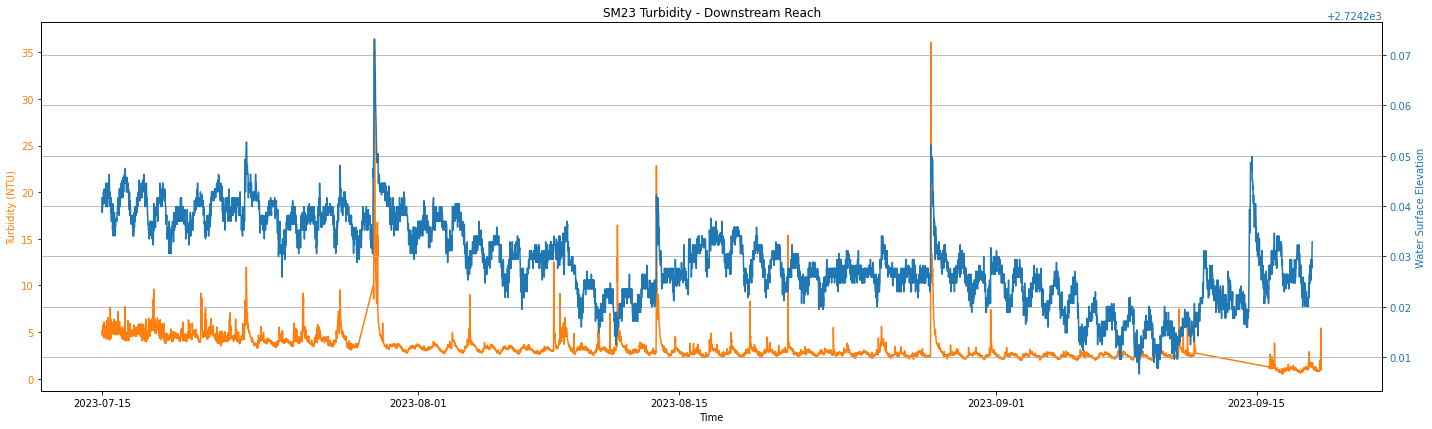

In [12]:
# plotting
fig, ax1 = plt.subplots(figsize=(20, 6), facecolor='w', edgecolor='k')

color = 'tab:orange'
ax1.set_xlabel('Time')
ax1.set_ylabel('Turbidity (NTU)', color=color)
ax1.plot(df_sonde.index, df_sonde['Turbidity FNU'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Water Surface Elevation', color=color)  # we already handled the x-label with ax1
ax2.plot(df_depth.index, df_depth['P3C'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('SM23 Turbidity - Downstream Reach')
plt.grid(True)
plt.savefig('SM23_Turbidity_Downstream.png')
plt.show()

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

#file_path = 'path/to/your/dataset.csv'
sonde = pd.read_csv('Sonde_Summer2023_Upstream.csv')
depth = pd.read_csv('piezometer_WSE_2023_corrected.csv', usecols=[0, 10])

# convert the 'timestamp' column to datetime format
sonde['Date (MM/DD/YYYY)'] = sonde['Date (MM/DD/YYYY)'].astype(str)
sonde['Time (HH:mm:ss)'] = sonde['Time (HH:mm:ss)'].astype(str)
sonde['Date_Time'] = pd.to_datetime(sonde['Date (MM/DD/YYYY)'] + ' ' + sonde['Time (HH:mm:ss)']) # combine them into one
depth['Date_Time'] = pd.to_datetime(depth['Date_Time'])

# assign them as the indexes
sonde.set_index('Date_Time', inplace=True)
depth.set_index('Date_Time', inplace=True)

# date of interest
df_sonde = sonde[(sonde.index > '2023-07-29') & (sonde.index < '2023-09-19')]
df_depth = depth[(depth.index > '2023-07-29') & (depth.index < '2023-09-19')]

C:\Users\huck4481\AppData\Local\Temp\ipykernel_7720\2202988383.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  depth = pd.read_csv('piezometer_WSE_2023_corrected.csv', usecols=[0, 10])


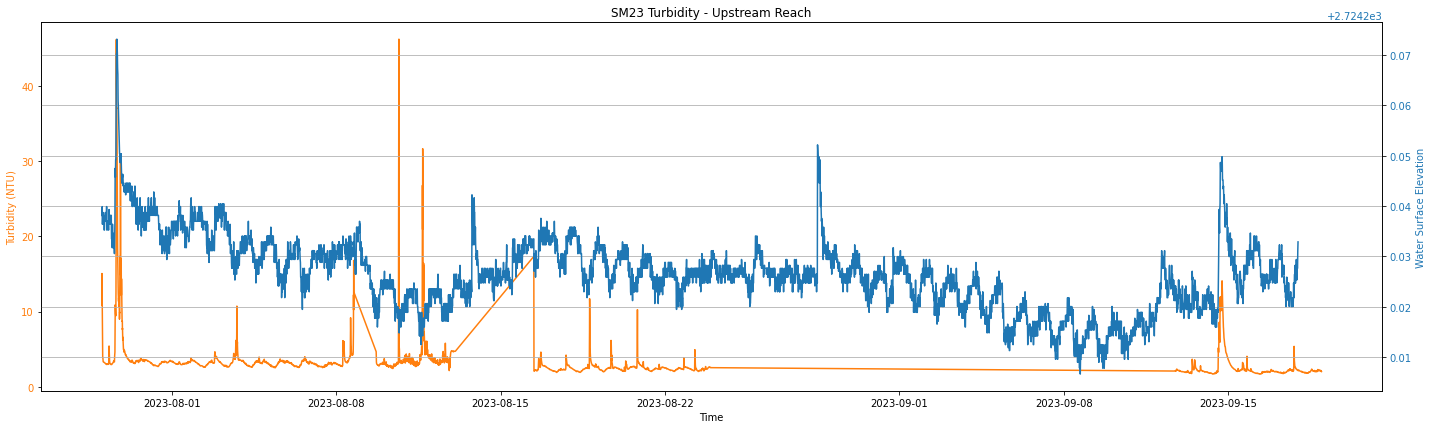

In [19]:
# plotting
fig, ax1 = plt.subplots(figsize=(20, 6), facecolor='w', edgecolor='k')

color = 'tab:orange'
ax1.set_xlabel('Time')
ax1.set_ylabel('Turbidity (NTU)', color=color)
ax1.plot(df_sonde.index, df_sonde['Turbidity FNU'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Water Surface Elevation', color=color)  # we already handled the x-label with ax1
ax2.plot(df_depth.index, df_depth['P3C'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('SM23 Turbidity - Upstream Reach')
plt.grid(True)
plt.savefig('SM23_Turbidity_Upstream.png')
plt.show()

Need to smooth out!

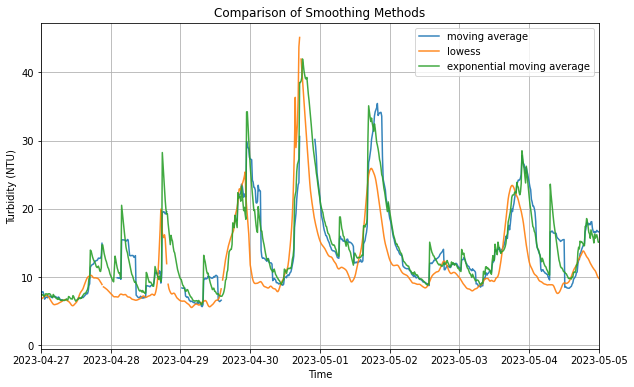

In [2]:
# Moving average
window_size = 20
df['MA_turbidity'] = df['Turbidity (NTU) (922381)'].rolling(window=window_size).mean()

# Lowess smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
frac = 0.009
df['lowess_turbidity'] = lowess(df['Turbidity (NTU) (922381)'], df.index, frac=frac, return_sorted=False)

# Exponential moving average
df['EMA_turbidity'] = df['Turbidity (NTU) (922381)'].ewm(span=window_size, adjust=False).mean()

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['MA_turbidity'], label='moving average', alpha=0.9)
plt.plot(df.index, df['lowess_turbidity'], label='lowess', alpha=0.9)
plt.plot(df.index, df['EMA_turbidity'], label='exponential moving average', alpha=0.9)

# Set x-limits to April of the year in the data
plt.xlim([pd.Timestamp(year=int(df.index.year[0]), month=4, day=27), pd.Timestamp(year=int(df.index.year[0]), month=5, day=5)])


plt.title('Comparison of Smoothing Methods')
plt.xlabel('Time')
plt.ylabel('Turbidity (NTU)')
plt.legend()
plt.grid(True)
plt.show()

I think that the EMA is the best fit for this data. The lowess is a little too smooth and the moving average creates data gaps. The EMA is a good balance between the two.

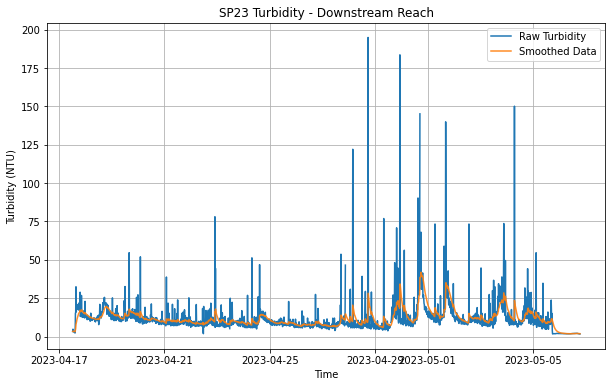

In [3]:
# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Turbidity (NTU) (922381)'], label='Raw Turbidity')
plt.plot(df.index, df['EMA_turbidity'], label='Smoothed Data', alpha=0.9)
plt.title('SP23 Turbidity - Downstream Reach')
plt.xlabel('Time')
plt.ylabel('Turbidity (NTU)')

# Set x-limits to April of the year in the data
#plt.xlim([pd.Timestamp(year=int(df.index.year[0]), month=4, day=27), pd.Timestamp(year=int(df.index.year[0]), month=5, day=5)])

plt.legend()
plt.grid(True)
plt.savefig('SP23_Turbidity_Downstream.png', dpi=300)
plt.show()

## For upstream reach

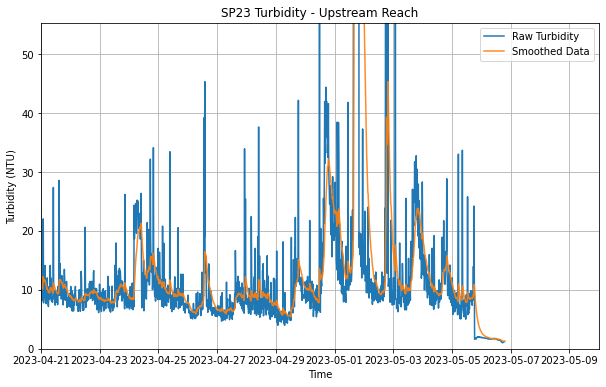

In [7]:
df = pd.read_csv('Spring2023_Upstream.csv')

# Convert the 'timestamp' column to datetime format
df['Date Time'] = pd.to_datetime(df['Date Time'])

# Set 'timestamp' as the index of the DataFrame
df.set_index('Date Time', inplace=True)

# EMA smoothing
df['EMA_turbidity'] = df['Turbidity (NTU) (922381)'].ewm(span=window_size, adjust=False).mean()

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Turbidity (NTU) (922381)'], label='Raw Turbidity')
plt.plot(df.index, df['EMA_turbidity'], label='Smoothed Data', alpha=0.9)
plt.title('SP23 Turbidity - Upstream Reach')
plt.xlabel('Time')
plt.ylabel('Turbidity (NTU)')

# Set x-limits to April of the year in the data
plt.xlim([pd.Timestamp(year=int(df.index.year[0]), month=4, day=21), pd.Timestamp(year=int(df.index.year[0]), month=5, day=10)])
# Select the data within the desired time frame
selected_data = df.loc[pd.Timestamp(year=int(df.index.year[0]), month=4, day=21):pd.Timestamp(year=int(df.index.year[0]), month=4, day=30), 'Turbidity (NTU) (922381)']
# Find the maximum value of this data
max_value = selected_data.max()
# Set y-limits to a range that includes the maximum value
plt.ylim([0, max_value + 10])  # Adding 10 for some padding

plt.legend()
plt.grid(True)
plt.savefig('SP23_Turbidity_Upstream.png', dpi=300)
plt.show()